# EDA
- We will look at US domestic flights from 2019.
- Do some exploratory analysis.
- Maybe finish with ML algorithm to predict delays.

## Datasets
- [Flight on-time data](https://www.transtats.bts.gov/)
- [Airline & Aiports database](https://openflights.org/data.html)

In [37]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, PolynomialFeatures, MinMaxScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import sys

# import local functions
path_to_functions = 'C:/Users/Zaca/Documents/GitHub/useful-functions/'
sys.path.append(path_to_functions)
from plotting import default_plot, get_colors


data_path = 'C:/Users/Zaca/Documents/Datasets/flights/'

In [2]:
# open file (1.3GB so it will be slow)
flights = pd.read_csv(data_path + '2019.csv', index_col=0)

C:\Users\Zaca\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [3]:
# get column description from file
cols = pd.read_csv(data_path + 'columns.txt', sep=',', names=['colname', 'coldesc'], index_col= False)
cols

,colname,coldesc
0,FlightDate,Flight Date (yyyymmdd)
1,Month,Month
2,DayofMonth,Day of Month
3,DayOfWeek,Day of Week
4,Reporting_Airline,Unique Carrier Code
5,Flight_Number_Reporting_Airline,Flight Number
6,OriginAirportID,Airport ID
7,Origin,Origin Airport
8,OriginCityName,City Name
9,OriginState,Origin Airport State Code


In [4]:
# examine top 5 rows
flights.head()

,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,Origin,OriginCityName,OriginState,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,4,5,2019-01-04,OO,5657,14698,SBP,"San Luis Obispo, CA",CA,...,0.0,70.0,51.0,37.0,190.0,0.0,0.0,0.0,0.0,0.0
1,1,4,5,2019-01-04,OO,5658,12266,IAH,"Houston, TX",TX,...,0.0,103.0,109.0,76.0,438.0,0.0,0.0,0.0,0.0,0.0
2,1,4,5,2019-01-04,OO,5658,14783,SGF,"Springfield, MO",MO,...,0.0,132.0,121.0,88.0,513.0,0.0,0.0,0.0,0.0,0.0
3,1,4,5,2019-01-04,OO,5659,12389,ISN,"Williston, ND",ND,...,0.0,118.0,110.0,80.0,576.0,0.0,0.0,0.0,0.0,0.0
4,1,4,5,2019-01-04,OO,5660,13342,MKE,"Milwaukee, WI",WI,...,0.0,184.0,163.0,127.0,896.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# examine dtypes
flights.dtypes

Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
FlightDate                          object
Reporting_Airline                   object
Flight_Number_Reporting_Airline      int64
OriginAirportID                      int64
Origin                              object
OriginCityName                      object
OriginState                         object
DestAirportID                        int64
Dest                                object
DestCityName                        object
DestState                           object
CRSDepTime                           int64
DepTime                            float64
DepDelay                           float64
TaxiOut                            float64
WheelsOff                          float64
WheelsOn                           float64
TaxiIn                             float64
CRSArrTime                           int64
ArrTime                            float64
ArrDelay   

In [6]:
print(flights.shape[0])
flights.isna().sum()

7268232


Month                              0
DayofMonth                         0
DayOfWeek                          0
FlightDate                         0
Reporting_Airline                  0
Flight_Number_Reporting_Airline    0
OriginAirportID                    0
Origin                             0
OriginCityName                     0
OriginState                        0
DestAirportID                      0
Dest                               0
DestCityName                       0
DestState                          0
CRSDepTime                         0
DepTime                            0
DepDelay                           0
TaxiOut                            0
WheelsOff                          0
WheelsOn                           0
TaxiIn                             0
CRSArrTime                         0
ArrTime                            0
ArrDelay                           0
Cancelled                          0
Diverted                           0
CRSElapsedTime                     0
A

### Holy sh!t there are 7.27 million flights in our dataset.
- Let's try to look at the first few columns.

1. Flight date is in object format, let's turn in into date-time for timeseries analysis.
2. Reporting airline are abbreviated (IATA codes), we need to find an actual human name for them.

## Airlines

In [7]:
# loot at unique values for Airlines.
airlines = flights.Reporting_Airline.unique()
print(airlines)

# there's only 17 of them... megacorporations...

['OO' 'AS' '9E' 'AA' 'MQ' 'WN' 'G4' 'OH' 'B6' 'NK' 'DL' 'YV' 'EV' 'F9'
 'YX' 'UA' 'HA']


In [8]:
# I found an Airline dataset we can try to use to translate IATA codes.
airlines_ds = pd.read_csv(data_path + 'world_airlines.csv', index_col=0, names=['NAME', 'ALIAS', 'IATA', 'ICAO', 'CALLSIGN', 'COUNTRY', 'ACTIVE'])

In [9]:
# we can make a dictionary to translate codes to actual names
airline_dictionary = {k:airlines_ds.loc[airlines_ds.IATA == k, 'NAME'].values[0] for k in airlines}
airline_dictionary

{'OO': 'SkyWest',
 'AS': 'Alaska Airlines',
 '9E': 'Pinnacle Airlines',
 'AA': 'American Airlines',
 'MQ': 'American Eagle Airlines',
 'WN': 'Southwest Airlines',
 'G4': 'Allegiant Air',
 'OH': 'Comair',
 'B6': 'JetBlue Airways',
 'NK': 'Spirit Airlines',
 'DL': 'Delta Air Lines',
 'YV': 'Mesa Airlines',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines',
 'YX': 'Midwest Airlines',
 'UA': 'United Airlines',
 'HA': 'Hawaiian Airlines'}

In [10]:
# ok this was beautiful.
# let's look at the share of flights between them.
flights.Reporting_Airline.value_counts(normalize=True)

WN    0.182653
DL    0.135937
AA    0.127162
OO    0.112247
UA    0.085125
YX    0.044112
MQ    0.043292
B6    0.040274
OH    0.038750
AS    0.035912
9E    0.034719
YV    0.030349
NK    0.027640
F9    0.018307
EV    0.017636
G4    0.014370
HA    0.011514
Name: Reporting_Airline, dtype: float64

labels = ['At Risk', 'Bottom', 'BlaBla', 'Potential', 'Top']
data = list(zip(labels, first['first_off'].values))

fig, ax = plt.subplots(figsize=(4, 4))
ax = default_plot(ax, ['left'])
plt.xticks(rotation=90)
plt.ylabel('% First Purchase Off')
ax.xaxis.set_tick_params(length=0)
ax.spines['bottom'].set_visible(False)
plt.bar(range(len(data)), [x[1] for x in data], width=.9, color=[bottom_c, potential_c, at_risk_c, top_c])
plt.xticks(range(len(data)), [x[0] for x in data])
plt.tight_layout()
plt.ylim(0, 30)
plt.savefig('figures/final/off_first_purchase.png', dpi=300)
plt.show()

In [56]:
airline_share = flights.Reporting_Airline.value_counts(normalize=True)
data = pd.DataFrame(airline_share).reset_index().rename(columns={'index':'airline_code', 'Reporting_Airline':'market_share'})

cmap = 'viridis_r'
colors = get_colors(cmap, data.shape[0], plot=False)

TypeError: get_colors() got an unexpected keyword argument 'plot'

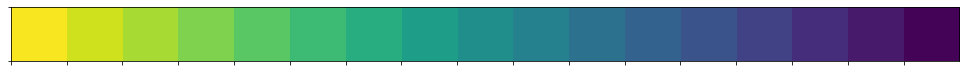

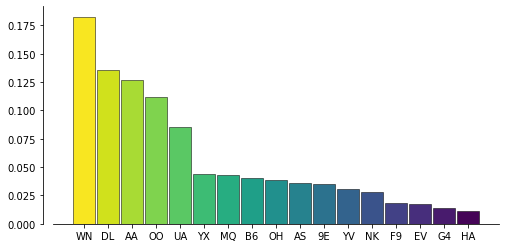

In [52]:
def categorical_bar(data, colors)

    labels = list(data[data.columns[0]])
    values = list(data[data.columns[1]])



fig, ax = plt.subplots(figsize=(8,4))
ax = default_plot(ax, ['left'])
x = range(len(values))

plt.ylabel('')
plt.xticks(x, labels)
plt.bar(x, values, width=.9, color=colors, edgecolor='k', lw=.5)
plt.show()

# Airports
- Get database of worldwide Airports to extract information such as latitude, longitude, names, city and so on and merge with the IATA codes in our dataset.

In [109]:
airports_ds = pd.read_csv(data_path + 'world_airports.csv', index_col=0, names=['ID', 'NAME', 'CITY', 'COUNTRY', 'IATA', 'ICAO', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'TIMEZONE', 'DST', 'TZ_OLSON', 'TYPE', 'SOURCE'])

In [110]:
# grab all the airports in our dataset
airports = flights.Origin.unique()

# create a dictionary for airport name with IATA codes
airport_dictionary = {k:airports_ds.loc[airports_ds.IATA == k, 'NAME'].values[0] for k in airports}

# apparently there are 2 airports in our dataset that are not present in the database, I could just 
# drop all the flights that involve these locations, bu I kind of like to fix it.
# all we need are their names and their locations

airports_ds = airports_ds[airports_ds.IATA.isin(airports)]
airports_ds

,NAME,CITY,COUNTRY,IATA,ICAO,LATITUDE,LONGITUDE,ALTITUDE,TIMEZONE,DST,TZ_OLSON,TYPE,SOURCE
ID,,,,,,,,,,,,,
1970,Pago Pago International Airport,Pago Pago,American Samoa,PPG,NSTU,-14.331000,-170.710007,32,-11,U,Pacific/Pago_Pago,airport,OurAirports
2244,Saipan International Airport,Saipan,Northern Mariana Islands,SPN,PGSN,15.119000,145.729004,215,10,U,Pacific/Saipan,airport,OurAirports
2246,Antonio B. Won Pat International Airport,Agana,Guam,GUM,PGUM,13.483400,144.796005,298,10,U,Pacific/Guam,airport,OurAirports
2883,Cyril E. King Airport,St. Thomas,Virgin Islands,STT,TIST,18.337299,-64.973396,23,-4,U,America/St_Thomas,airport,OurAirports
2884,Henry E Rohlsen Airport,St. Croix Island,Virgin Islands,STX,TISX,17.701900,-64.798599,74,-4,U,America/St_Thomas,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8314,Hilton Head Airport,Hilton Head Island,United States,HHH,KHXD,32.224400,-80.697502,19,-5,A,America/New_York,airport,OurAirports
9543,Ogden Hinckley Airport,Ogden,United States,OGD,KOGD,41.195900,-112.012001,4473,-7,A,America/Denver,airport,OurAirports
9776,Stillwater Regional Airport,Stillwater,United States,SWO,KSWO,36.161201,-97.085701,1000,-6,A,America/Chicago,airport,OurAirports


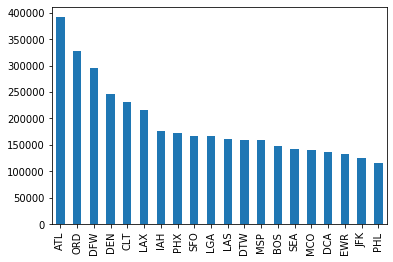

In [111]:
# top 20 airports by number of flights
flights.Origin.value_counts()[:20].plot.bar()

## Dates

In [112]:
flights.FlightDate.dtypes

dtype('O')

In [113]:
# Our flight date is still an object, let's change it to datetime.
flights.FlightDate = pd.to_datetime(flights.FlightDate)

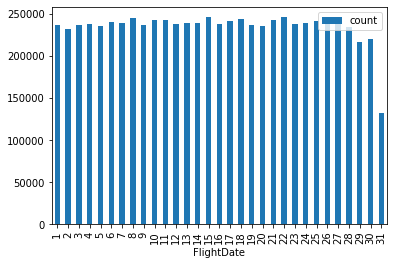

In [114]:

monthly_flights = flights.groupby(flights.FlightDate.dt.day).agg(count=('FlightDate', 'count'))
monthly_flights.plot(kind="bar")

We could explore this dataset forever, I still kind of want to, but let's get to what matters
# Delays
- For now the threshold for delay will be 15 min.

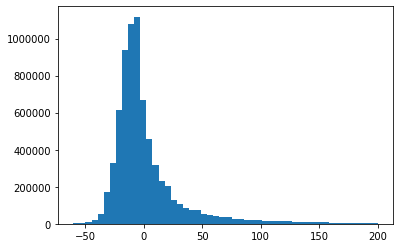

In [115]:
# let's look at the distribution of delays
plt.hist(flights['ArrDelay'], bins= 50, range=(-60, 200));

In [118]:
# Delays by day of the week
delays_by_day_of_week = flights.pivot_table(index=['CRSDepTime'], aggfunc={'delay_off': lambda x: np.sum(x)/len(x)}).reset_index()
delays_by_day_of_week

,CRSDepTime,delay_off
0,1,0.046512
1,2,0.086207
2,3,0.166667
3,4,0.186047
4,5,0.185550
...,...,...
1373,2355,0.168013
1374,2356,0.183983
1375,2357,0.216981
1376,2358,0.210445


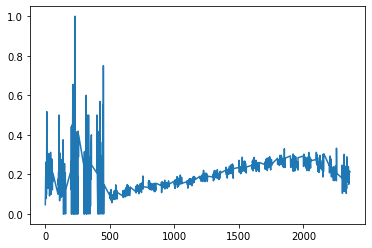

In [119]:
plt.plot(delays_by_day_of_week.CRSDepTime, delays_by_day_of_week.delay_off)

In [120]:
# departure and arrival delays (> threshold)
delay_threshold = 15
flights['delay_on'] = np.where(flights['DepDelay'] >= delay_threshold, 1, 0)
flights['delay_off'] = np.where(flights['ArrDelay'] >= delay_threshold, 1, 0)
flights['delay_averted'] = np.where(flights.delay_on - flights.delay_off == 1, 1, 0)
flights['delay_on_air'] = np.where(flights.delay_on - flights.delay_off == -1, 1, 0)

In [121]:
# calculate total percentage of flights delayed on departure
flights.delay_on.value_counts(normalize=True)

0    0.813784
1    0.186216
Name: delay_on, dtype: float64

In [122]:
# calculate total percentage of flights delayed on arrival
flights.delay_off.value_counts(normalize=True)

0    0.80886
1    0.19114
Name: delay_off, dtype: float64

In [123]:
# calculate total percentage of flights delayed on departure but arrived on time
flights.delay_averted.value_counts(normalize=True)

0    0.963349
1    0.036651
Name: delay_averted, dtype: float64

In [124]:
# calculate total percentage of flights departed on time but arrived late
flights.delay_on_air.value_counts(normalize=True)

0    0.958424
1    0.041576
Name: delay_on_air, dtype: float64

In [125]:
# group by airline and get percentage of delays
delays_by_airline = flights.pivot_table(index=['Reporting_Airline'], aggfunc={'delay_off': lambda x: np.sum(x)/len(x)}).reset_index()

In [126]:
delays_by_airline.sort_values(by='delay_off', ascending=False)

,Reporting_Airline,delay_off
5,EV,0.257755
6,F9,0.254928
3,B6,0.253252
13,UA,0.213568
15,YV,0.211654
1,AA,0.211089
9,MQ,0.209253
7,G4,0.206246
11,OH,0.197861
16,YX,0.192458


In [127]:
delays_by_airport = flights.pivot_table(index=['Dest'], aggfunc={'delay_off': lambda x: np.sum(x)/len(x)}).reset_index().sort_values(by='delay_off', ascending=False)

In [128]:
delays_by_airport

,Dest,delay_off
274,PSE,0.327183
115,EWR,0.302094
222,MKG,0.300442
204,LWB,0.291139
250,OTH,0.290960
...,...,...
355,WYS,0.062016
205,LWS,0.058223
107,EKO,0.056801
53,BTM,0.048961


# Plotting Airports on Map by % of Flights Delayed

In [129]:
# merge delay data onto location data
delay_map = airports_ds[['IATA','NAME','LATITUDE', 'LONGITUDE']].merge(delays_by_airport[['Dest', 'delay_off']], left_on='IATA', right_on='Dest')

In [130]:
delay_map

,IATA,NAME,LATITUDE,LONGITUDE,Dest,delay_off
0,PPG,Pago Pago International Airport,-14.331000,-170.710007,PPG,0.266667
1,SPN,Saipan International Airport,15.119000,145.729004,SPN,0.097872
2,GUM,Antonio B. Won Pat International Airport,13.483400,144.796005,GUM,0.122156
3,STT,Cyril E. King Airport,18.337299,-64.973396,STT,0.178476
4,STX,Henry E Rohlsen Airport,17.701900,-64.798599,STX,0.172103
...,...,...,...,...,...,...
355,HHH,Hilton Head Airport,32.224400,-80.697502,HHH,0.208007
356,OGD,Ogden Hinckley Airport,41.195900,-112.012001,OGD,0.192308
357,SWO,Stillwater Regional Airport,36.161201,-97.085701,SWO,0.138790
358,XWA,Williston Basin International Airport,48.259722,-103.750556,XWA,0.163366


In [131]:
# making an interactive plot of USA and its airports
# learning plotly express


fig = go.Figure(data=go.Scattergeo(
        lon = delay_map['LONGITUDE'],
        lat = delay_map['LATITUDE'],
        text = delay_map['NAME'] + ' ' + delay_map['delay_off'].astype('str'),
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Viridis_r',
            cmin = 0,
            color = delays_by_airport['delay_off'],
            cmax = delays_by_airport['delay_off'].max(),
            colorbar_title="Flights late >60 min")))

fig.update_layout(
        title = 'US Airports',
        geo_scope='usa',
    )
fig.show()

In [132]:
# COOL! I knew how to make them static but I might need to spend a lot of time learning how to customize this

# Machine Learning
- Using classification algorithms to try and predict if it arrives late or not.
- We need to select relevant columns

In [133]:
flights = flights[flights['Cancelled'] == 0]

In [134]:
flights.shape[0]

7268232

In [135]:
# selecting columns based on what information a user would have before the flight
feature_cols = ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'CRSDepTime', 'Distance', 'delay_off']

In [136]:
# use only cols we want
mlc_flights = flights[feature_cols]
mlc_flights.dtypes

FlightDate           datetime64[ns]
DayOfWeek                     int64
Reporting_Airline            object
Origin                       object
Dest                         object
CRSDepTime                    int64
Distance                    float64
delay_off                     int32
dtype: object

In [137]:
# we need to label the airlines and the airports
le = LabelEncoder()
label_cols = ['Reporting_Airline', 'Origin', 'Dest']
mlc_flights[label_cols] = mlc_flights[label_cols].apply(le.fit_transform)

C:\Users\Zaca\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



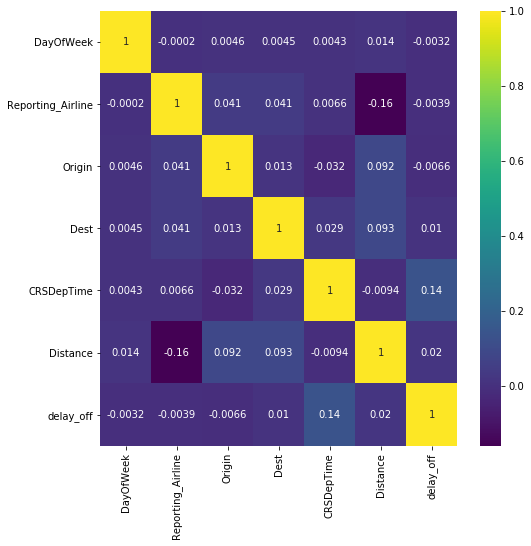

In [138]:
plt.figure(figsize=(8, 8))
correlation = mlc_flights.corr()
sns.heatmap(correlation, cmap='viridis', annot=True)

# Classification

In [139]:
# get features and target
y = mlc_flights['delay_off']
X = mlc_flights.drop('delay_off', axis=1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# divide train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
# Logistic Regression
lr = LogisticRegression()#class_weight='balanced')
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test)*100

print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

score = lr.score(X_test, y_test)*100

y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)
print(f"Logistic Regression Test Accuracy {round(score, 2)}%")
print(confusion_matrix(y_test, y_pred))

# Regression

In [ ]:
feature_cols = ['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'CRSDepTime', 'Distance', 'ArrDelay']
mlr_flights = flights[feature_cols]

le = LabelEncoder()
label_cols = ['Reporting_Airline', 'Origin', 'Dest']
mlr_flights[label_cols] = mlr_flights[label_cols].apply(le.fit_transform)

scaler = StandardScaler()
scaler.fit_transform(mlr_flights)

# get features and target
y = mlr_flights['ArrDelay']
X = mlr_flights.drop('ArrDelay', axis=1)

# divide train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Create linear regression
regr = LinearRegression()
model = regr.fit(X, y)
model.score(X_test, y_test)